In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [5]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [6]:
df.shape

(891, 3)

In [7]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [9]:
#filling  null values
df['Age']=df['Age'].fillna(df['Age'].mean())

In [10]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
X_train.head(2)

,Age,Fare
331,45.5,28.5
733,23.0,13.0


In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.6927374301675978

In [17]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


np.float64(0.6554681647940075)

In [23]:
kbin_age=KBinsDiscretizer(
    n_bins=15,
    encode='ordinal',
    strategy='uniform'
)


In [24]:
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [25]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])


In [26]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [27]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
              26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
              53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
              80.        ])                                                   ],
      dtype=object)

In [28]:
trf.named_transformers_['second'].bin_edges_




array([array([  0.     ,   7.2292 ,   7.75   ,   7.88916,   7.925  ,   8.6625 ,
               10.5    ,  13.     ,  15.54834,  21.045  ,  26.     ,  29.355  ,
               39.6875 ,  65.     ,  90.     , 512.3292 ])                     ],
      dtype=object)

In [29]:

output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [30]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [31]:

output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
221,27.0,5.0,13.0000,7.0,"(26.947, 32.252]","(10.5, 13.0]"
554,22.0,4.0,7.7750,2.0,"(21.641, 26.947]","(7.75, 7.889]"
733,23.0,4.0,13.0000,7.0,"(21.641, 26.947]","(10.5, 13.0]"
847,35.0,6.0,7.8958,3.0,"(32.252, 37.557]","(7.889, 7.925]"
690,31.0,5.0,57.0000,12.0,"(26.947, 32.252]","(39.688, 65.0]"


In [32]:

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [33]:

accuracy_score(y_test,y_pred2)

0.6480446927374302

In [34]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6599875156054931)

In [35]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6633208489388265


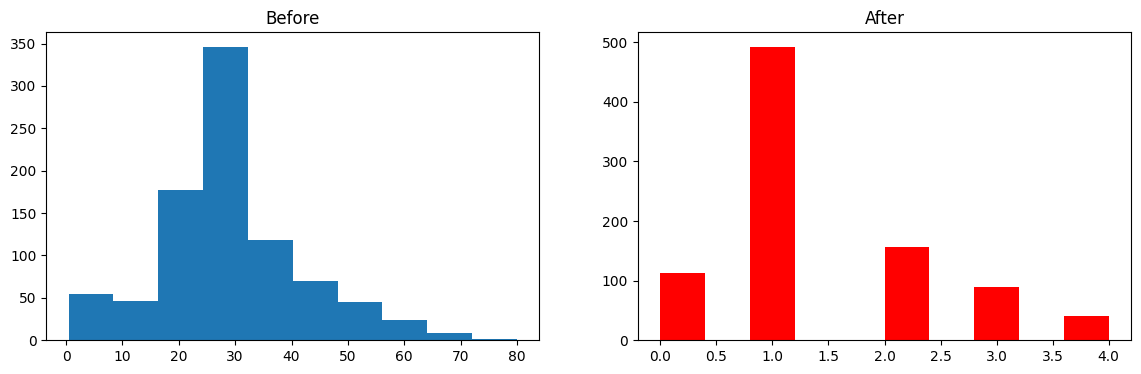

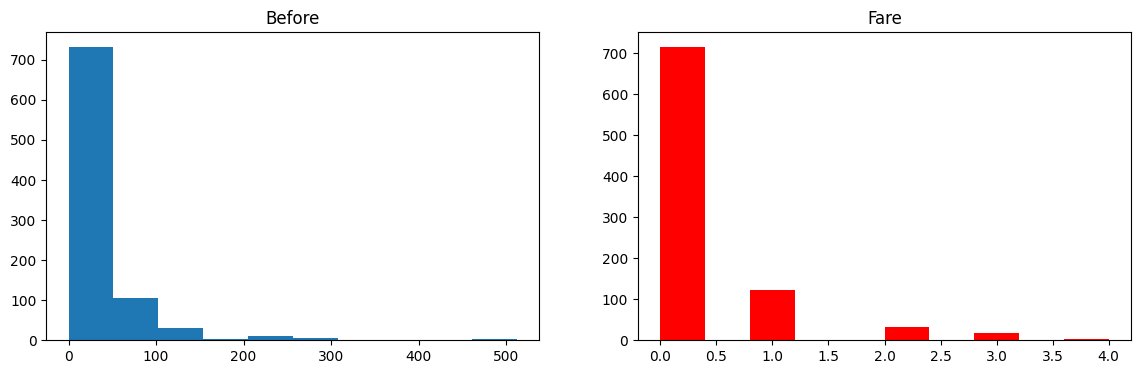

In [36]:
discretize(5,'kmeans')